In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
data = pd.read_csv('../artifacts/sentiment_analysis.csv')

In [5]:
data.head()

,id,label,tweet
0,1,0,#fingerprint #Pregnancy Test https://goo.gl/h1...
1,2,0,Finally a transparant silicon case ^^ Thanks t...
2,3,0,We love this! Would you go? #talk #makememorie...
3,4,0,I'm wired I know I'm George I was made that wa...
4,5,1,What amazing service! Apple won't even talk to...


###Data Preprocessing

In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7920 entries, 0 to 7919
Data columns (total 3 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      7920 non-null   int64 
 1   label   7920 non-null   int64 
 2   tweet   7920 non-null   object
dtypes: int64(2), object(1)
memory usage: 185.8+ KB


In [7]:
data.nunique()

id       7920
label       2
tweet    7918
dtype: int64

In [8]:
data.duplicated().sum()

0

In [9]:
!pip install nltk

##Text Preprocessing

In [10]:
import re #regular expressions
import string
import nltk

In [11]:
data['tweet'].head()

0    #fingerprint #Pregnancy Test https://goo.gl/h1...
1    Finally a transparant silicon case ^^ Thanks t...
2    We love this! Would you go? #talk #makememorie...
3    I'm wired I know I'm George I was made that wa...
4    What amazing service! Apple won't even talk to...
Name: tweet, dtype: object

###Convert uppercase to lowercase

In [12]:
def lower_case(text):
    text = text.lower()
    return text
data['tweet'] = data['tweet'].apply(lower_case)
#data['tweet'] = data['tweet'].apply(lambda x: " ". join(x.lower() for x in x.split()))

In [13]:
data['tweet'].head()

0    #fingerprint #pregnancy test https://goo.gl/h1...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

###Remove hyperlinks

In [14]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(re.sub(r'^https://.*[\r\n]*', '', x, flags = re.MULTILINE) for x in x.split()))

In [15]:
data['tweet'].head()

0    #fingerprint #pregnancy test  #android #apps #...
1    finally a transparant silicon case ^^ thanks t...
2    we love this! would you go? #talk #makememorie...
3    i'm wired i know i'm george i was made that wa...
4    what amazing service! apple won't even talk to...
Name: tweet, dtype: object

###Remove punctuations

In [16]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [17]:
def remove_punctuations(text):
    for punctuation in string.punctuation:
        text = text.replace(punctuation, '')
    return text

data['tweet'] = data['tweet'].apply(remove_punctuations)

In [18]:
data['tweet'].head()

0    fingerprint pregnancy test  android apps beaut...
1    finally a transparant silicon case  thanks to ...
2    we love this would you go talk makememories un...
3    im wired i know im george i was made that way ...
4    what amazing service apple wont even talk to m...
Name: tweet, dtype: object

###Remove Numbers

In [19]:
data['tweet'].tail(10)

7910    perfect match instagood applewatch red instagr...
7911    i am completely in love with the new iphone em...
7912    tune in turn on drop out  gtd in one app httpb...
7913    ok so my galaxy crashed after one day now i ha...
7914    gain followers rt this must follow me i follow...
7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely 90 year old neighbor with he...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

In [20]:
data['tweet'] = data['tweet'].str.replace(r'\d+', '', regex = True)

In [21]:
data['tweet'].tail(5)

7915    live out loud lol liveoutloud selfie smile son...
7916    we would like to wish you an amazing day make ...
7917    helping my lovely  year old neighbor with her ...
7918    finally got my smart pocket wifi stay connecte...
7919    apple barcelona apple store bcn barcelona trav...
Name: tweet, dtype: object

###Remove Stopwords

In [22]:
nltk.download('stopwords', download_dir = '../static/model')

[nltk_data] Downloading package stopwords to ../static/model...
[nltk_data]   Unzipping corpora\stopwords.zip.


True

In [23]:
with open ('../static/model/corpora/stopwords/english', 'r') as file:
    sw = file.read().splitlines()

In [24]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(x for x in x.split() if x not in sw))

In [25]:
data['tweet'].head()

0    fingerprint pregnancy test android apps beauti...
1    finally transparant silicon case thanks uncle ...
2    love would go talk makememories unplug relax i...
3    im wired know im george made way iphone cute d...
4    amazing service apple wont even talk question ...
Name: tweet, dtype: object

###Stemming

In [26]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

In [27]:
data['tweet'] = data['tweet'].apply(lambda x: " ".join(ps.stem(x) for x in x.split()))

In [28]:
data['tweet'].head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

##Building Vocabulary

In [29]:
from collections import Counter
vocab = Counter()

In [30]:
for sentence in data['tweet']:
    vocab.update(sentence.split())

In [31]:
len(vocab)

19066

In [32]:
data.shape

(7920, 3)

In [33]:
tokens = [key for key in vocab if vocab[key] > 10]

In [34]:
tokens

['test',
 'android',
 'app',
 'beauti',
 'cute',
 'health',
 'iger',
 'iphoneonli',
 'iphonesia',
 'iphon',
 'final',
 'case',
 'thank',
 'yay',
 'soni',
 'xperia',
 'love',
 'would',
 'go',
 'talk',
 'relax',
 'smartphon',
 'wifi',
 'connect',
 'im',
 'know',
 'made',
 'way',
 'home',
 'amaz',
 'servic',
 'appl',
 'wont',
 'even',
 'question',
 'pay',
 'stupid',
 'support',
 'softwar',
 'updat',
 'fuck',
 'phone',
 'big',
 'time',
 'happi',
 'us',
 'instap',
 'instadaili',
 'xperiaz',
 'new',
 'type',
 'c',
 'charger',
 'cabl',
 'uk',
 '…',
 'amazon',
 'year',
 'newyear',
 'start',
 'technolog',
 'samsunggalaxi',
 'iphonex',
 'shop',
 'listen',
 'music',
 'likeforlik',
 'photo',
 'fun',
 'selfi',
 'water',
 'camera',
 'picoftheday',
 'sun',
 'instagood',
 'boy',
 'outdoor',
 'hey',
 'make',
 'ipod',
 'dont',
 'color',
 'inch',
 'crash',
 'everi',
 'need',
 'realli',
 'drop',
 'ball',
 'design',
 'give',
 'anoth',
 'crazi',
 'purchas',
 'lol',
 'work',
 'hard',
 'play',
 'ipad',
 'batt

In [35]:
len(tokens)

1152

###We can see if the above is overfitting during the training and testing phase

In [36]:
def save_vocabulary(lines, filename):
    data = '\n'.join(lines)
    file = open(filename, 'w', encoding = "utf-8")
    file.write(data)
    file.close()

save_vocabulary(tokens, '../static/model/vocabulary.txt')

###Training Testing data split

In [37]:
X = data['tweet']
y = data['label']

In [38]:
X.head()

0    fingerprint pregnanc test android app beauti c...
1    final transpar silicon case thank uncl yay son...
2    love would go talk makememori unplug relax iph...
3    im wire know im georg made way iphon cute dave...
4    amaz servic appl wont even talk question unles...
Name: tweet, dtype: object

In [39]:
y.head()

0    0
1    0
2    0
3    0
4    1
Name: label, dtype: int64

In [40]:
!pip install scikit-learn

In [41]:
from sklearn.model_selection import train_test_split

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [43]:
X_train

2938    leigh bought samsung tablet yesterday samsung ...
5554    amus someth work dont rememb work soni qx lens...
3681    hacker wifi password android app unitedst cute...
7453    chek gr deal amazon £ bitlygqhbnv ff friend gr...
1326    ma lucha con cabl wee regalopami xma soni zara...
                              ...                        
4631    goodnight peopl instagram knick im camper soni...
2054    narsi face lol iphon iphonesia iphoneonli ipho...
5855         serious three year use life much ask gogreen
4314    root android phone instal lagfix patch samsung...
2008    great job appl mang make anoth piec crap devic...
Name: tweet, Length: 7128, dtype: object

In [44]:
X_test

3216    hello gorgeou new babi hello blog daili instad...
4325    first turn look amaz mac appl cool instashar a...
760     chang style picoftheday ootd hair redbrown lfl...
3616    girl samsung galaxi famili collag smile girl w...
3872    charg devic wirelessli avail store samsung sam...
                              ...                        
1441    hors polym mouth appl scent httpwwwstackmarkco...
871       hello love newphon iphon iphon appl yay gold gb
371     gain follow rt must follow follow back follow ...
5638    new mobil phone soni xperia go new phone insta...
6177    birthday steve job appl discipl still worship ...
Name: tweet, Length: 792, dtype: object

###Vectorization

In [45]:
def vectorizer(ds, vocabulary):
    vectorized_list = []
    
    for sentence in ds:
        sentence_list = np.zeros(len(vocabulary))

        for i in range(len(vocabulary)):
            if vocabulary[i] in sentence.split():
                sentence_list[i] = 1

        vectorized_list.append(sentence_list)

    vectorized_list_new = np.asarray(vectorized_list, dtype = np.float32)

    return vectorized_list_new

In [46]:
vectorized_X_train = vectorizer(X_train, tokens)
vectorized_X_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 1., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [47]:
vectorized_X_test = vectorizer(X_test, tokens)
vectorized_X_test

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [48]:
vectorized_X_test.shape

(792, 1152)

In [49]:
vectorized_X_train.shape

(7128, 1152)

In [50]:
y_train.value_counts()

label
0    5304
1    1824
Name: count, dtype: int64

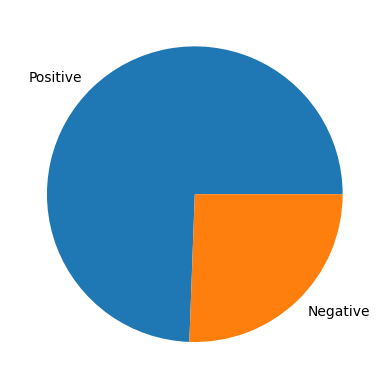

In [51]:
plt.pie(np.array([y_train.value_counts()[0], y_train.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

In [52]:
!pip install imbalanced-learn

In [53]:
from imblearn.over_sampling import SMOTE
smote = SMOTE()
vectorized_X_train_smote, y_train_smote = smote.fit_resample(vectorized_X_train, y_train)
print(vectorized_X_train_smote.shape, y_train_smote.shape)

(10608, 1152) (10608,)


In [54]:
y_train_smote.value_counts()

label
0    5304
1    5304
Name: count, dtype: int64

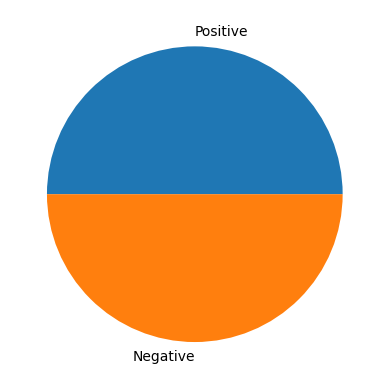

In [55]:
plt.pie(np.array([y_train_smote.value_counts()[0], y_train_smote.value_counts()[1]]), labels = ['Positive', 'Negative'])
plt.show()

###Model Training and Evaluation

In [56]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

In [57]:
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score

def training_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Training scores:\nAccuracy = {acc}\nPrecision = {pre}\nRecall = {rec}\nf1 score = {f1}\n')

def testing_scores(y_act, y_pred):
    acc = round(accuracy_score(y_act, y_pred), 3)
    pre = round(precision_score(y_act, y_pred), 3)
    rec = round(recall_score(y_act, y_pred), 3)
    f1 = round(f1_score(y_act, y_pred), 3)
    print(f'Testing scores:\nAccuracy = {acc}\nPrecision = {pre}\nRecall = {rec}\nf1 score = {f1}\n')

###Logistic Regression

In [58]:
lr = LogisticRegression()
lr.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = lr.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = lr.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 0.935
Precision = 0.91
Recall = 0.965
f1 score = 0.937

Testing scores:
Accuracy = 0.879
Precision = 0.723
Recall = 0.851
f1 score = 0.782



###Naive Bayes

In [59]:
mnb = MultinomialNB()
mnb.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = mnb.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = mnb.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 0.903
Precision = 0.867
Recall = 0.954
f1 score = 0.908

Testing scores:
Accuracy = 0.879
Precision = 0.702
Recall = 0.911
f1 score = 0.793



###Decision Tree Classifier

In [60]:
dtc = DecisionTreeClassifier()
dtc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = dtc.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = dtc.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 1.0
Precision = 1.0
Recall = 0.999
f1 score = 1.0

Testing scores:
Accuracy = 0.835
Precision = 0.69
Recall = 0.639
f1 score = 0.663



###Random Forest Classifier

In [61]:
rfc = RandomForestClassifier()
rfc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = rfc.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = rfc.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 1.0
Precision = 1.0
Recall = 0.999
f1 score = 1.0

Testing scores:
Accuracy = 0.884
Precision = 0.778
Recall = 0.762
f1 score = 0.77



###Support Vector Classifier

In [62]:
svc = SVC()
svc.fit(vectorized_X_train_smote, y_train_smote)

y_train_pred = svc.predict(vectorized_X_train_smote)

training_scores(y_train_smote, y_train_pred)

y_test_pred = svc.predict(vectorized_X_test)

testing_scores(y_test, y_test_pred)

Training scores:
Accuracy = 0.977
Precision = 0.959
Recall = 0.996
f1 score = 0.978

Testing scores:
Accuracy = 0.9
Precision = 0.773
Recall = 0.861
f1 score = 0.815



###Save the model

In [63]:
import pickle

with open('../static/model/model.pickle', 'wb') as file:
    pickle.dump(svc, file)